<a href="https://colab.research.google.com/github/DilyIvanova/TallerML/blob/main/clasificacion_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de imágenes de ropa

En primer lugar se importan las librerías que vamos a utilizar.

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

## Datos

 Usaremos la base de datos **Fashion MNIST**. Esta base de datos contiene 70000 artículos de ropa y cada artículo tiene:


*   **Imagen del artículo.** Su resolución es de 28x28 píxels y para representarla se utiliza un array de dimensiones 28x28 donde cada elemento es un píxel que toma valores en el rango [0,255]. De esta forma, el 0 es blanco, el 255 negro, y los valores intermedios distintas escalas de grises, desde más claros hasta más oscuros. 
*   **Etiqueta del artículo.** La categoría a la que pertenece cada artículo, toma valores enteros en un rango de [0,9]  y corresponde a las siguientes clases:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camiseta/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pantalón</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Jersey</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Deportiva</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Mochila</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle Bota</td>
  </tr>
</table>



Los datos se encuentran disponibles en TensorFlow. Mediante la función `load_lada()` se pueden cargar los dos conjuntos de datos necesarios para la creación del modelo:

*   **Imagenes para el entrenamiento.** Permiten ajustar los parámetros del modelo. Las cargaremos en `train_images` y `train_labels`.
*   **Imágenes para la validación.** Permiten comprobar la tasa de acierto del modelo. Las cargaremos en `test_images` y `test_labels`. Son imágenes que el modelo no ha utilizado para el entrenamiento y que "ve" por primera vez.

Como se puede ver, ambos conjuntos tienen las imágenes del artículo y las etiquetas.

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step



Las dimensiones de cada conjunto de datos son las siguientes:



In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Representación de una de las imágenes y su etiqueta


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

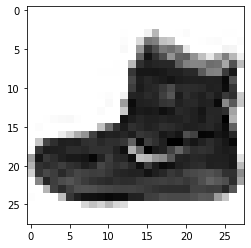

In [4]:
np.set_printoptions(linewidth=200)
plt.imshow(train_images[0], cmap=plt.cm.binary) #La primera imagen
print(train_labels[0]) #La primera etiqueta
print(train_images[0]) #La imagen como array

### Representación de las 25 primeras imágenes con su etiqueta

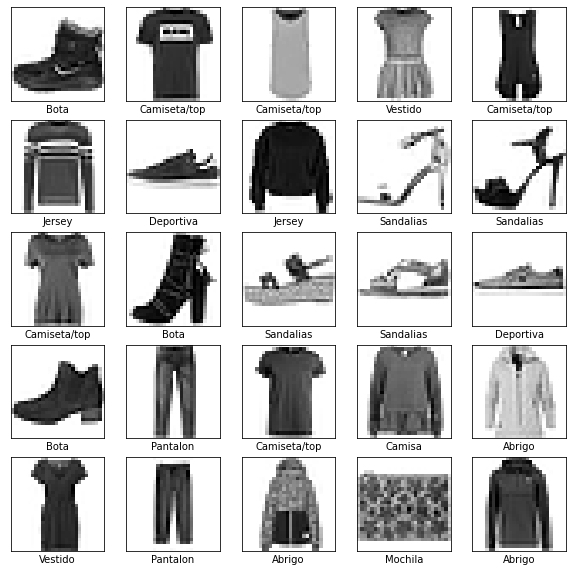

In [5]:
class_names = ['Camiseta/top', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Deportiva', 'Mochila', 'Bota']
plt.figure(figsize=(10,10))
for i in range(0,25):
  image = train_images[i]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  i+=1
plt.show()

## Desarrollo del modelo

### Creación del modelo

Consiste en definir las distintas capas de neuronas que se van a utilizar. En este ejemplo utilizaremos una red convolucional, el objetivo de esta red es replicar los procesos que ocurren en la corteza visual y su uso es idóneo para la clasificación de imágenes. Primero extrae las características de la imagen en 2D y después obtiene el vector de una dimensión para predecir la clase.

#### Red convolucional

*   **Capa convolucional** `Conv2D`.  Cuenta con un kernel o núcleo. No es más que una matriz pequeña, que se va desplazando a lo largo y ancho de las imágenes detectando patrones en ellas. A medida que se añaden más capas, se detectan patrones más concretos.
*   **Capa MaxPooling** `MaxPooling2D`. Capa que reduce el tamaño de la imagen. 
* **Capa de aplanado** `Flatten`. Transforman la matriz en un vector de una dimensión porque .
* **Capa con perceptrón multicapa clásico** `Dense` Todas las neuronas de una capa conectadas con todas las neuronas de la capa siguiente. La última capa tiene que tener tantas neuronas como clases tienen los datos, es por ello que tiene 10 neuronas.




In [7]:
 model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

### Compilación del modelo

Consiste en definir las funciones y métricas que nos ayudan a ajustar los parámetros (pesos de las neuronas) y medir la capacidad de predicción del modelo.
* **Función de optimización.** Función para optimizar el modelo. Para ajustar los parámetros internos del modelo y minimizar la pérdida 'loss'.
* **Función de pérdida.** Esta es la función que se minimizará con el optimizador, el objetivo es que las salidas sean las deseadas.
* **Métricas.** Permiten medir la capacidad de predicción del modelo. En este caso se utiliza Accuracy, métrica que mide la proporción de imágenes correctamente clasificadas.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Podemos obtener un resumen con las dimensiones del array que se obtiene tras pasar por cada capa y el número de parámetros que se ajustan.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Entrenamiento del modelo

Es necesario especificar algunos parámetros para el entrenamiento:


* **Imágenes para el entrenamiento.** Para el ajuste de los pesos.
* **Épocas.** Indica cuántas veces se realizará el entrenamiento.
* **Tamaño de los batch.** El conjunto de datos se divide en subconjuntos más pequeños y en cada época, para cada batch se actualizan los pesos de las neuronas. No se trabaja con todos los datos porque la memoria es limitada.
* **Imágenes para la validación.** Para comprobar la capacidad de predicción del modelo ante datos totalmente nuevos.



In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=200, validation_data= (test_images, test_labels))

Epoch 1/10
300/300 [==============================] - 66s 218ms/step - loss: 1.2003 - accuracy: 0.8135 - val_loss: 0.3819 - val_accuracy: 0.8613
Epoch 2/10
300/300 [==============================] - 66s 220ms/step - loss: 0.3098 - accuracy: 0.8872 - val_loss: 0.3291 - val_accuracy: 0.8815
Epoch 3/10
300/300 [==============================] - 66s 219ms/step - loss: 0.2639 - accuracy: 0.9031 - val_loss: 0.3145 - val_accuracy: 0.8866
Epoch 4/10
300/300 [==============================] - 66s 219ms/step - loss: 0.2319 - accuracy: 0.9140 - val_loss: 0.3043 - val_accuracy: 0.8912
Epoch 5/10
300/300 [==============================] - 66s 219ms/step - loss: 0.2092 - accuracy: 0.9225 - val_loss: 0.3078 - val_accuracy: 0.8910
Epoch 6/10
300/300 [==============================] - 66s 218ms/step - loss: 0.1871 - accuracy: 0.9309 - val_loss: 0.2808 - val_accuracy: 0.9026
Epoch 7/10
300/300 [==============================] - 65s 218ms/step - loss: 0.1742 - accuracy: 0.9345 - val_loss: 0.3021 - val_ac

### Representación de la tasa de acierto

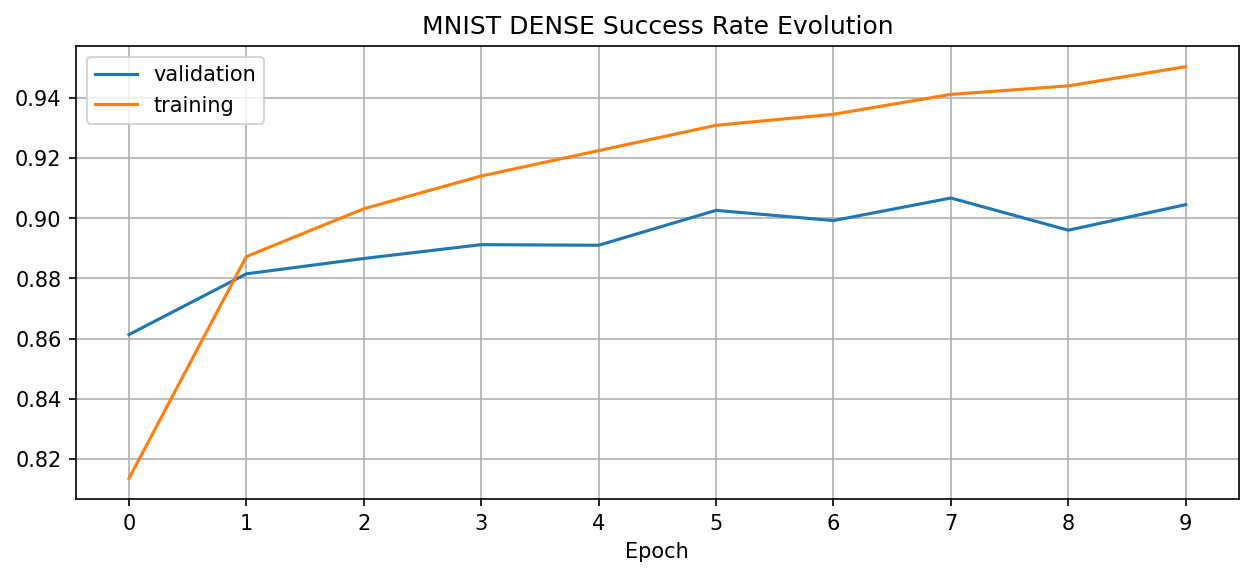

In [11]:
plt.figure(figsize=(10,4), dpi=150)
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.legend()
plt.title('MNIST DENSE Success Rate Evolution')
plt.xlabel('Epoch')
plt.xticks(history.epoch)
plt.grid()
plt.show()

Como podemo ver, la tasa de acierto del modelo es mayor para el conjunto de datos del entrenamiento. 
> ¿Es normal que la tasa de acierto sea menor para el conjunto de datos de validación?



## Predicción de un conjunto de imágenes

Una vez entrenado del modelo, podemos seleccionar imágenes y ver las predicciones que realiza para ellas. Obtenemos las predicciones de los datos de validación y su dimensión:

In [29]:
prediction = model.predict(test_images)

In [13]:
prediction.shape

(10000, 10)

Seleccionamos la predicción de la primera imagen:

In [14]:
prediction[0]

array([8.1596063e-13, 1.6651413e-11, 3.6411058e-11, 3.9582405e-13, 8.3272434e-12, 5.5986889e-06, 5.0615176e-13, 7.7433367e-07, 3.2265536e-08, 9.9999368e-01], dtype=float32)

El elemento devuelto para la predicción de cada imagen es un array de 10 elementos


> ¿Qué representa cada elemento del array?



Seleccionamos la posición del máximo valor de la predicción de la primera imagen.

In [15]:
class_names[np.argmax(prediction[0])]

'Bota'

Vemos la verdadera etiqueta de la primera imagen del conjunto de datos de entrenamiento.

In [16]:
class_names[test_labels[0]]

'Bota'

En este caso se trata de un acierto, el modelo predice la clase 9 y efectivamente, su etiqueta real es la 9.

### Representación gráfica de las predicciones

Se crea unas funicones para la representación de los artículos de ropa junto con la clase real, la clase predicha y la probabilidad de la clase predicha.

In [17]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Representación de una imagen

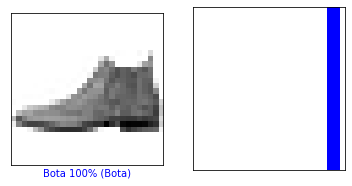

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

Debajo de la imagen se muestra la clase predicha, la probabilidad de pertenencia a esta clase y entre paréntesis, la clase real.

#### Representación de un conjunto de imágenes

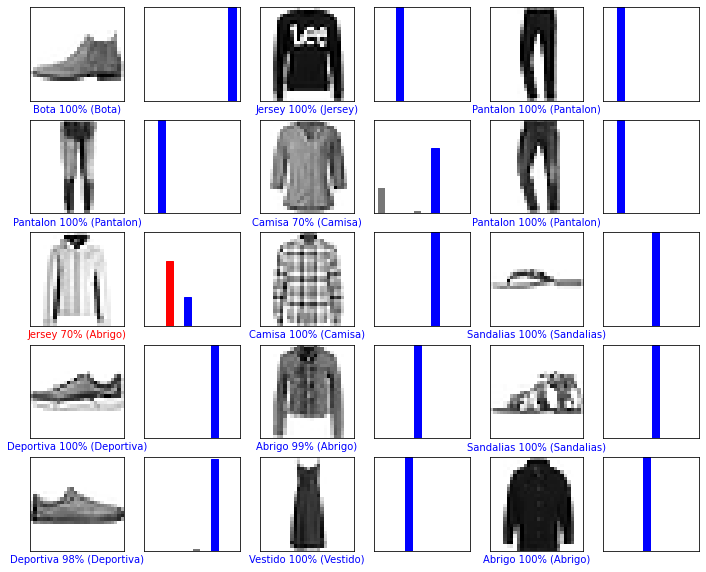

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)

Se puede ver que en una de las imágenes no hay acierto, se trata de una deportiva y el modelo predice con un 96% la clase sandalia.

## Predicción de una sola imagen

Se define el array con los nombres de los artículos para poder hacer la correspondencia de número y nombre más adelante.

In [20]:
class_names = ['Camiseta/top', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Deportiva', 'Mochila', 'Bota']

`tensorflow.keras` esta optimizado para hacer predicciones de una colecciones de ejemplos a la vez, por lo que aunque usemos una sola imagen, tenemos que darle una lista.

In [32]:
numero_imagen = 10
img = test_images[numero_imagen]

Representación de la imagen seleccionada

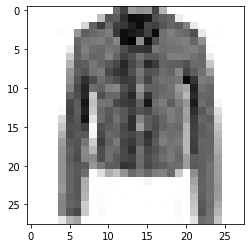

In [33]:
plt.imshow(img, cmap=plt.cm.binary)

Creación de la lista con la imagen seleccionada

In [34]:
img = np.array([img])
img.shape

(1, 28, 28)

Predicción

In [35]:
img_prediction = model.predict(img)
img_prediction

array([[2.1794383e-05, 2.6831000e-07, 1.3982047e-03, 6.3766635e-07, 9.9269098e-01, 5.7929648e-09, 5.8881552e-03, 1.1975912e-09, 2.7068814e-09, 1.7535940e-09]], dtype=float32)

La clase predicha es:

In [36]:
clase_predicha = np.argmax(img_prediction)
class_names[clase_predicha]

'Abrigo'

La clase real es:

In [37]:
clase_real = test_labels[numero_imagen]
class_names[clase_real]

'Abrigo'

Para representar la imagen i y su predicción, usar el siguiente código

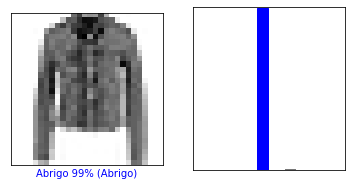

In [38]:
i = numero_imagen
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)